In [60]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression
import matplotlib_inline
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.stats import shapiro, kstest, norm
import warnings
warnings.filterwarnings('ignore')

(20,)
(60,)
均值	 80.1
标准差	 9.710556897224652
极差	 44
偏度	 -0.48026956591489756
峰度	 0.2735736169781351


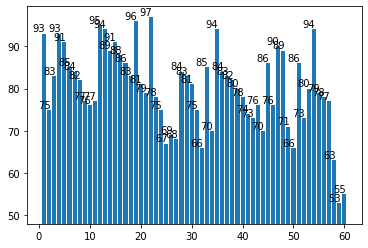

p(0.948) > 0.05 	 so satisfy norm distribution
置信区间	 (61.06765821161266, 99.13234178838732)


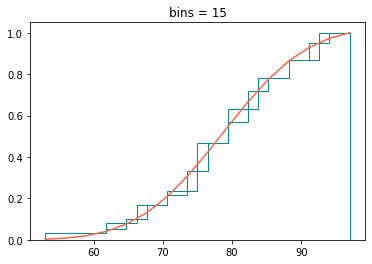

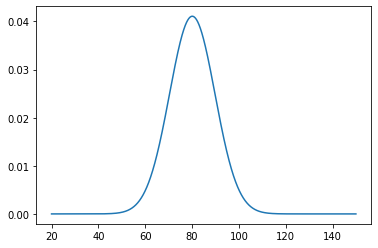

In [38]:
data_1 = '93 75 83 93 91 85 84 82 77 76 77 95 94 89 91 88 86 83 96 81 79 97 78 75 67 69 68 84 83 81 75 66 85 70 94 84 83 82 80 78 74 73 76 70 86 76 90 89 71 66 86 73 80 94 79 78 77 63 53 55'
data_1 = np.array([int(i) for i in data_1.split(' ')])
data_1_pd = pd.Series(data_1)
print(data_1)
mean = data_1.mean()
std  = data_1.std(ddof=1)
print("均值\t",mean)
print("标准差\t",std)
print("极差\t",data_1.max() - data_1.min())
print("偏度\t",data_1_pd.skew())
print("峰度\t",data_1_pd.kurt())
plt.bar(np.arange(1, len(data_1)+1), data_1-data_1.min()+5, bottom=data_1.min()-5)
for x, y in enumerate(data_1):
    plt.text(x, y, '%2d'%y, ha='center', va='bottom')
plt.show()
k, p = kstest(data_1, 'norm', (data_1.mean(), data_1.std()))
print("p(%.3f) > 0.05"%p, '\t so satisfy norm distribution')
conf_interval = norm.interval(0.95,loc=mean, scale=std)
print('置信区间\t',conf_interval)
nt, bins, patches = plt.hist(data_1, bins=10, histtype='step',
                             cumulative=True, density=True, color='darkcyan')
nt, bins, patches = plt.hist(data_1, bins=15, histtype='step', cumulative=True, density=True, color='darkcyan')
plt.title('bins = 15')
y = (1 / (np.sqrt(2 * np.pi) * std)) * np.exp(-0.5 * ((bins - mean) ** 2 / std** 2))
y = y.cumsum()
y = y / y[-1]
plt.plot(bins, y, 'tomato', linewidth = 1.5, label = 'Theoretical')
plt.savefig('经验函数分布图2.jpg', dpi=200)
plt.show()
x = np.arange(20, 150, 0.01)
y = norm.pdf(x, loc=mean, scale=std)
plt.plot(x, y)
plt.show()

In [53]:
data_2_1 = '19 17 15 16 12 21 15 22 16 18 9 12 19 12 17 13 14 9 9 18'
data_2_1 = np.array([int(i)+100 for i in data_2_1.split(' ')])
data_2_2 = '18 19 15 22 18 21 20 22 28 16 20 23 21 19 17 19 28 26 18 25'
data_2_2 = np.array([int(i)+100 for i in data_2_2.split(' ')])
alpha=0.95
data_2_3 = data_2_2 - data_2_1
print("一月均值\t",data_2_1.mean())
print("一月标准差\t",data_2_1.std())
print("一月置信区间(%.2f)\t"%alpha, stats.t.interval(0.95, len(data_2_1)-1, loc=data_2_1.mean(), scale=stats.sem(data_2_1)))
print("二月均值\t",data_2_2.mean())
print("二月标准差\t",data_2_2.std())
print("二月置信区间(%.2f)\t"%alpha, stats.t.interval(0.95, len(data_2_2)-1, loc=data_2_2.mean(), scale=stats.sem(data_2_2)))
print("一二月价格差")
print("均值\t",data_2_3.mean())
print("标准差\t",data_2_3.std())
print("置信区间(%.2f)\t"%alpha, stats.t.interval(0.95, len(data_2_3)-1, loc=data_2_3.mean(), scale=stats.sem(data_2_3)))
print("\n对一月来说成立，而二月不太合适")

一月均值	 115.15
一月标准差	 3.771935842508459
一月置信区间(0.95)	 (113.33881957294425, 116.96118042705577)
二月均值	 120.75
二月标准差	 3.6176649927819464
二月置信区间(0.95)	 (119.01289621559044, 122.48710378440956)
一二月价格差
均值	 5.6
标准差	 5.332916650389353
置信区间(0.95)	 (3.039279282682204, 8.160720717317796)

对一月来说成立，而二月不太合适


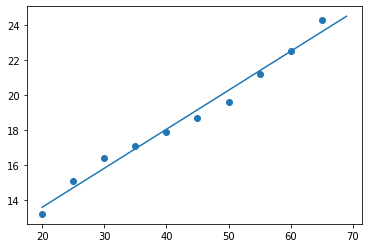

一元线性回归方程为: 	y=9.121 + 0.223*x
相关系数(R^2)： 0.982；
回归分析(SSR)： 102.594；		残差(SSE)：1.866；
           F ： 439.831；	pf ： 2.8047105728009022e-08
           t ： 20.972；		pt ： 1.4023552864004521e-08
{'R': 0.9910278113452945, 'R2': 0.9821361228598446, '线性回归检验': True, 'a+bx中a，b置信区间': ([9.091969420093724, 9.150454822330522], [0.222342239474576, 0.22371836658603006])}
{'lxx': 2062.5, 'lyy': 104.46000000000002, 'lxy': 460.0, 'sigma_est': 0.48296746863280404, 'x_mean': 42.5, 'y_mean': 18.6, 'test_level': 0.06470050272855053, 'ndim': 10}
(41.92071836509382, 42.07928163490618)


In [107]:
data_3_1 = np.arange(20, 70, 5).reshape([-1,1])
data_3_2 = np.array([float(i) for i in '13.2 15.1 16.4 17.1 17.9 18.7 19.6 21.2 22.5 24.3'.split(' ')]).reshape([-1,1])
model = LinearRegression()
model.fit(data_3_1, data_3_2)
plt.scatter(data_3_1, data_3_2)
tmp = np.arange(20, 70, 1)
tmp = tmp[:, np.newaxis]
plt.plot(tmp, model.predict(tmp))
plt.show()
def get_lr_stats(x, y, model):
    message0 = f'一元线性回归方程为: \ty={model.intercept_[0]:.3f} + {model.coef_[0][0]:.3f}*x'
    n     = len(x)
    y_prd = model.predict(x)
    Regression = sum((y_prd - np.mean(y))**2) # 回归
    Residual   = sum((y - y_prd)**2)          # 残差
    R_square   = Regression / (Regression + Residual) # 相关性系数R^2
    F          = (Regression / 1) / (Residual / ( n - 2 ))  # F 分布
    pf         = stats.f.sf(F, 1, n-2)
    message1 = (f'相关系数(R^2)： {R_square[0]:.3f}；\n' +
                f'回归分析(SSR)： {Regression[0]:.3f}；\t\t残差(SSE)：{Residual[0]:.3f}；\n' +
                f'           F ： {F[0]:.3f}；\tpf ： {pf[0]}')
    ## T
    L_xx  =  n * np.var(x)
    sigma =  np.sqrt(Residual / (n-2))
    t     =  model.coef_ * np.sqrt(L_xx) / sigma
    pt    =  stats.t.sf(t, n-2)
    message2 = f'           t ： {t[0][0]:.3f}；\t\tpt ： {pt[0][0]}'
    print(message0 +'\n' +message1 + '\n'+message2)
get_lr_stats(data_3_1, data_3_2, model)

#对升序序列找到对匹配val值最接近的点坐标
def index_fit(y, val):
    if val >= y[-1]:
        return len(y) - 1
    for i, yi in enumerate(y):
        if val >= yi and val <= y[i + 1]:
            if abs(val - yi) <= abs(val - y[ i + 1]):
                fit_index = i
            else:
                fit_index = i+1
            break
    return fit_index

#用于计算Lxx, Lyy
def laa(x):
    x_mean = np.mean(x)
    lxx = np.sum((x-x_mean)**2)
    return lxx

#用于计算Lxy
def lab(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    lxy = np.sum((x-x_mean)*(y-y_mean))
    return lxy


#一元线性回归模型
def polyfit_one(x, y, alpha):
    assert len(x) == len(y)
    n = len(x)
    assert n > 2
    lxx = laa(x)
    lyy = laa(y)
    lxy = lab(x, y)

    R = lxy/(np.sqrt(lxx) * np.sqrt(lyy))
    R2 = R*R   #计算相关系数与决定系数

    b_est = lxy/lxx  #计算b估计
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    a_est = y_mean - b_est * x_mean   #计算a估计
    Qe = lyy - b_est * lxy
    sigma_est2 = Qe / (n - 2)

    sigma_est = np.sqrt(sigma_est2) #sigma估计

    test = np.abs(b_est * np.sqrt(lxx))/sigma_est
    test_level = stats.t.ppf(1 - alpha/2, df=n - 2)
    linear_test = test > test_level   #线性回归检验

    #a,b的置信区间
    b_int = [b_est - test_level * sigma_est / np.sqrt(lxx), b_est + test_level * sigma_est / np.sqrt(lxx)]
    a_int = [y_mean - b_int[1] * x_mean, y_mean - b_int[0] * x_mean]

    poly_int = (a_int, b_int)

    poly_val = (a_est, b_est)

    #返回回归模型相应参数
    test_val = {'R': R,
                'R2': R2,
                '线性回归检验': linear_test,
                'a+bx中a，b置信区间': poly_int,
                }
    process_val = {'lxx': lxx,
                   'lyy': lyy,
                   'lxy': lxy,
                   'sigma_est': sigma_est,
                   'x_mean': x_mean,
                   'y_mean': y_mean,
                   'test_level': test_level,
                   'ndim': n,
                   }
    return (poly_val, test_val, process_val)
poly_val, test_val, process_val = polyfit_one(data_3_1, data_3_2, 0.95)
# print("%f+%f*x"%poly_val)
print(test_val)
print(process_val)
#计算相应的预测区间
def confidence_interval(y0=None, *args, **kwargs):
    a_est, b_est = args
    sigma_est = kwargs['sigma_est']
    test_level= kwargs['test_level']
    lxx = kwargs['lxx']
    n = kwargs['ndim']
    x_mean = kwargs['x_mean']

    if isinstance(y0, (int, float, np.ndarray)):
        x0 = (y0 - a_est) / b_est
    elif isinstance(y0, (list, tuple)):
        y0 = np.array(y0)
        x0 = (y0 - a_est) / b_est
    else:
        return None

    conf_down = y0 - test_level * sigma_est * np.sqrt(1 + 1 / n + ((x0 - x_mean) ** 2 / lxx))
    conf_up = y0 + test_level * sigma_est * np.sqrt(1 + 1 / n + ((x0 - x_mean) ** 2 / lxx))

    confidence_interval = (conf_down, conf_up)

    return confidence_interval
print(confidence_interval(42, poly_val[0], poly_val[1], sigma_est=process_val['sigma_est'], test_level=process_val['test_level'], lxx=process_val['lxx'], ndim=process_val['ndim'], x_mean=process_val['x_mean']))

9.121212+0.223030*lnx


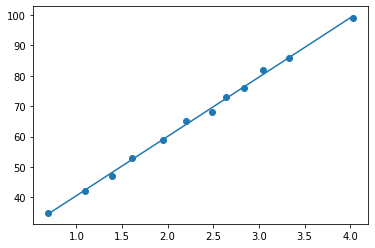

In [111]:
data_4_1 = np.array([int(i) for i in '2 3 4 5 7 9 12 14 17 21 28 56'.split()])
data_4_2 = np.array([int(i) for i in '35 42 47 53 59 65 68 73 76 82 86 99'.split()])
data_4_3 = np.log(data_4_1)[:, np.newaxis]
model = LinearRegression()
model.fit(data_4_3, data_4_2)
plt.scatter(data_4_3, data_4_2)
tmp = np.arange(data_4_3[0], data_4_3[-1]+0.001, 0.001)[:, np.newaxis]
plt.plot(tmp, model.predict(tmp))
poly_val, test_val, process_val = polyfit_one(data_3_1, data_3_2, 0.95)
print("%f+%f*lnx"%poly_val)

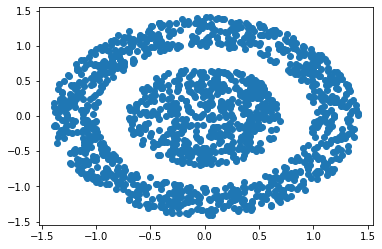

In [171]:
import scipy.io as scio
data_5 = scio.loadmat('./L6data.mat')
data_5 = [[i[0], i[1]] for i in data_5['X']]
x = [i[0] for i in data_5]
y = [i[1] for i in data_5]
plt.scatter(x, y)
plt.show()

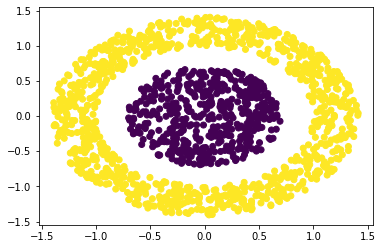

In [186]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, v_measure_score
model = DBSCAN(eps=0.2)
model.fit(data_5)
plt.scatter(x, y, c=model.labels_)
plt.show()